In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Import The Necessary Library
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
#Load The Dataset That is on .excel FIle 
data=pd.read_csv('/content/drive/MyDrive/project/Dataset/abalone.csv')


In [ ]:
#Head() Is Used the Show the first 5 Rows Of the Dataset 
data.head(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


In [ ]:
#Tail() Is Used the Show the first 5 Rows Of the Dataset 
data.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [ ]:
#Attributes For Each Columns 
data.keys()

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [ ]:
#Check The Shape Of The Dataset 
data.shape

(4177, 9)

In [ ]:
#Here Check the datatype for each attribute or column 
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [ ]:
#Here Get the information for each attribute of dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
#Check the Null Values of each rows in the dataset
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

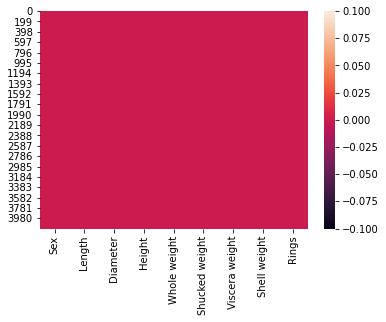

In [ ]:
#This is the heatmap that's show the NULL Value is having or not 
sns.heatmap(data.isnull())

In [ ]:
categorical = data.select_dtypes(include = ["object"]).keys()
categorical

Index(['Sex'], dtype='object')

In [ ]:
Numerical = data.select_dtypes(include = ["int64"]).keys()
Numerical

Index(['Rings'], dtype='object')

In [ ]:
Float = data.select_dtypes(include = ["float64"]).keys()
Float

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')

In [ ]:
data[Numerical].describe()#Describe the dataset Column Value 

,Rings
count,4177.000000
mean,9.933684
std,3.224169
min,1.000000
25%,8.000000
50%,9.000000
75%,11.000000
max,29.000000


In [ ]:
data[Float].describe()#Describe the dataset Column Value 

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [ ]:
data['age']=data['Rings']+1.5

In [ ]:
data.drop('Rings',axis=1,inplace=True)

In [ ]:
data['age'].dtypes

dtype('float64')

In [ ]:
data.head(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,8.5


Text(0.5, 1.0, 'Age vs length and sex')

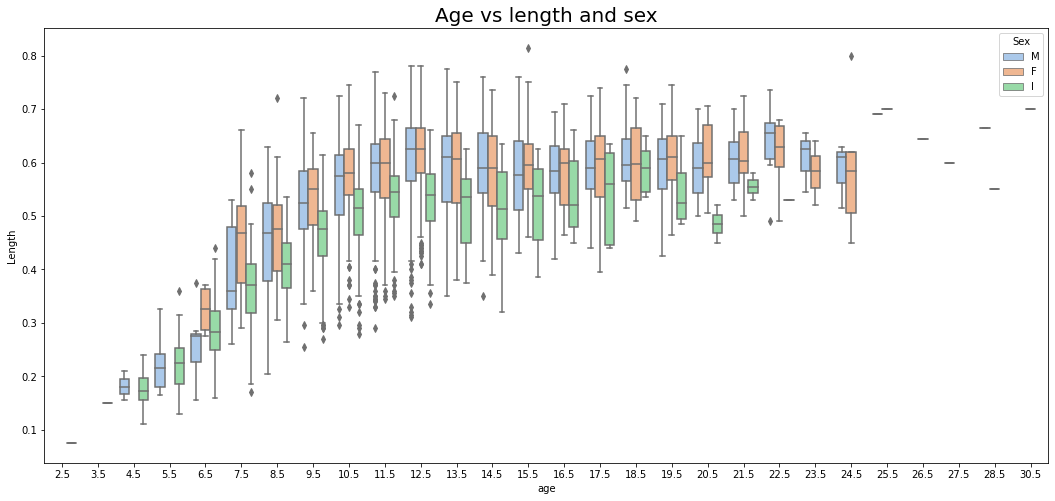

In [ ]:
# plotting a hue plot

plt.rcParams['figure.figsize'] = (18, 8)
sns.boxplot(data['age'], data['Length'], hue = data['Sex'], palette = 'pastel')
plt.title('Age vs length and sex', fontsize = 20)

Text(0.5, 1.0, 'age vs diameter and sex')

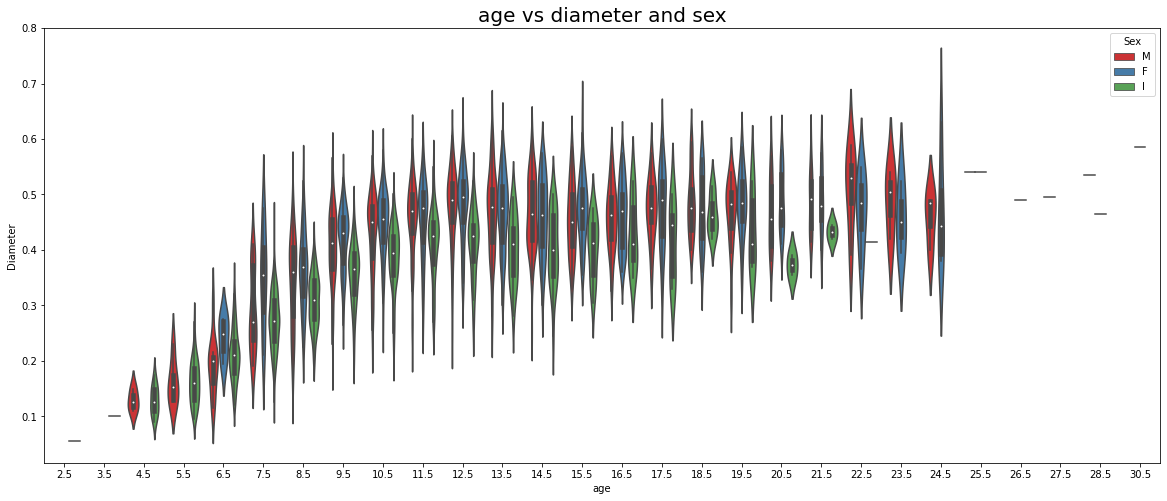

In [ ]:
# rings vs diameter and sex

plt.rcParams['figure.figsize'] = (20, 8)
sns.violinplot(data['age'], data['Diameter'], hue = data['Sex'], palette = 'Set1')
plt.title('age vs diameter and sex', fontsize = 20)


Text(0.5, 1.0, 'age vs height and sex')

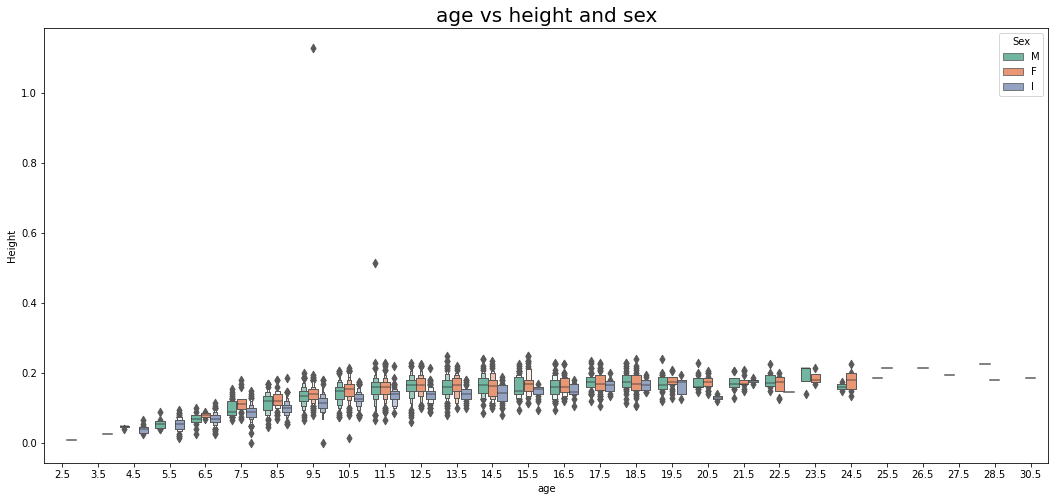

In [ ]:
# rings vs height and sex

plt.rcParams['figure.figsize'] = (18, 8)
sns.boxenplot(data['age'], data['Height'], hue = data['Sex'], palette = 'Set2')
plt.title('age vs height and sex', fontsize = 20)

Text(0.5, 1.0, 'age vs weight')

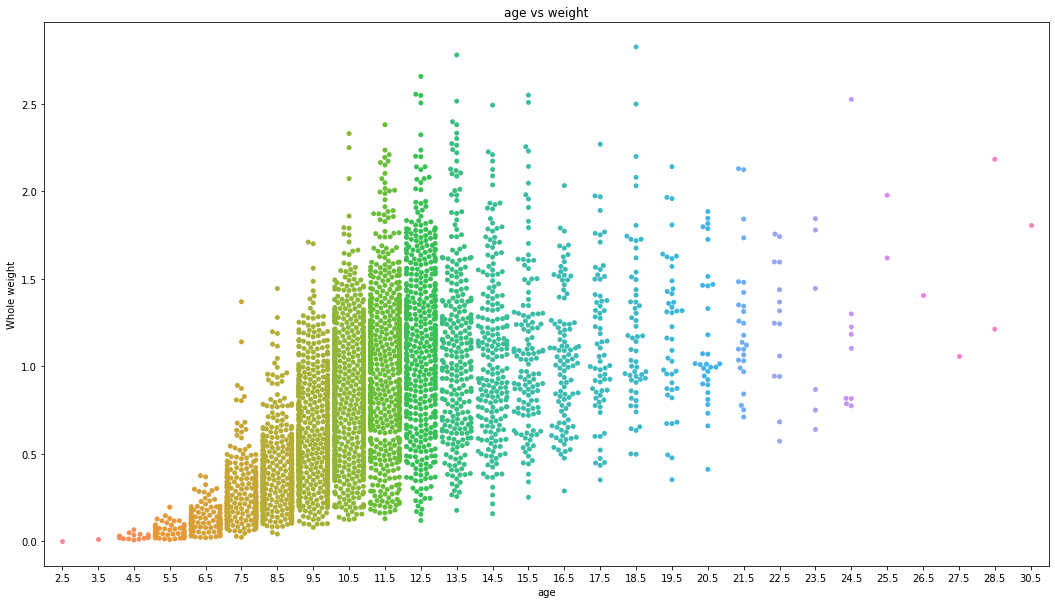

In [ ]:
# ring vs weight

plt.rcParams['figure.figsize'] = (18, 10)
sns.swarmplot(data['age'], data['Whole weight'])
plt.title('age vs weight')

Text(0.5, 1.0, 'age vs shucked weight')

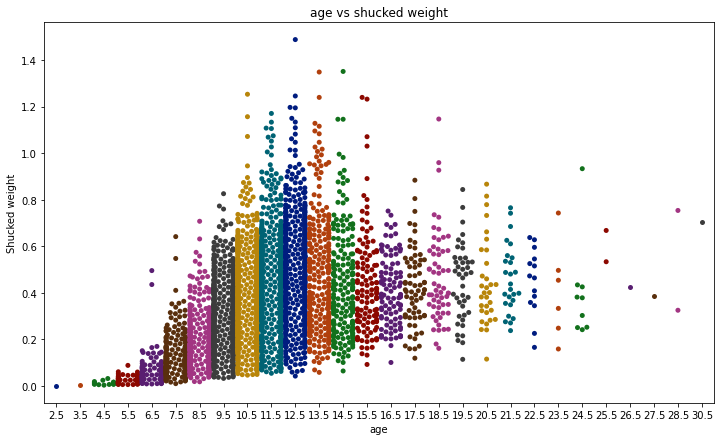

In [ ]:
# ring vs shucked weight

plt.rcParams['figure.figsize'] = (12, 7)
sns.swarmplot(data['age'], data['Shucked weight'], palette = 'dark')
plt.title('age vs shucked weight')

Text(0.5, 1.0, 'age vs Viscera Weight')

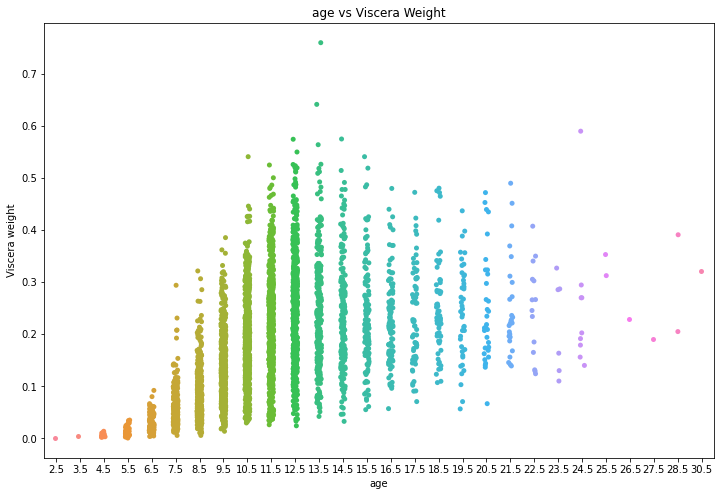

In [ ]:
# ring vs viscera weight

plt.rcParams['figure.figsize'] = (12, 8)
sns.stripplot(data['age'], data['Viscera weight'])
plt.title('age vs Viscera Weight')

Text(0.5, 1.0, 'age vs Shell weight')

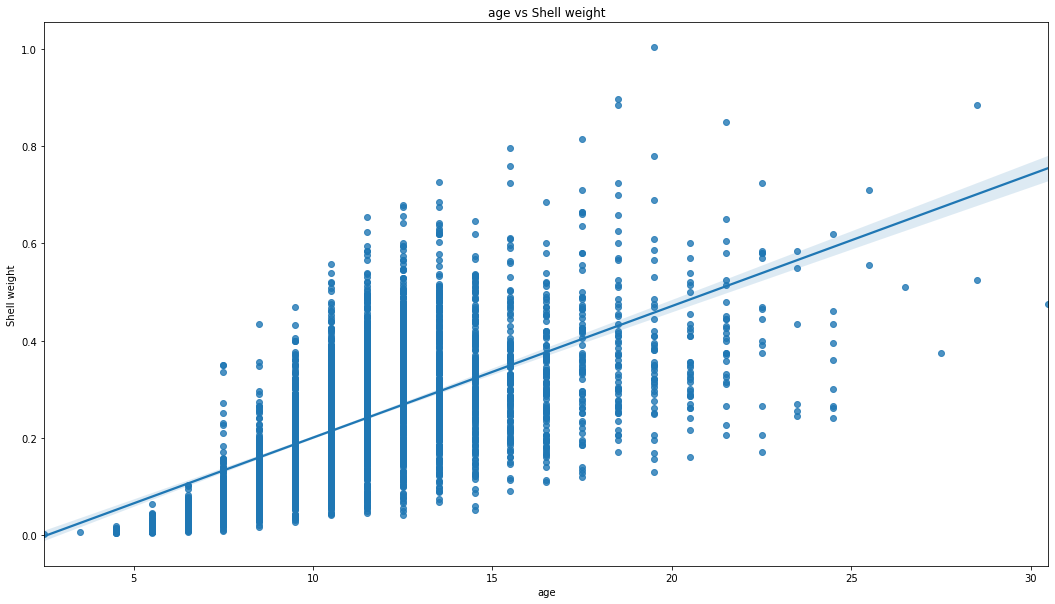

In [ ]:
# ring vs shell weight

plt.rcParams['figure.figsize'] = (18, 10)
sns.regplot(data['age'], data['Shell weight'])
plt.title('age vs Shell weight')

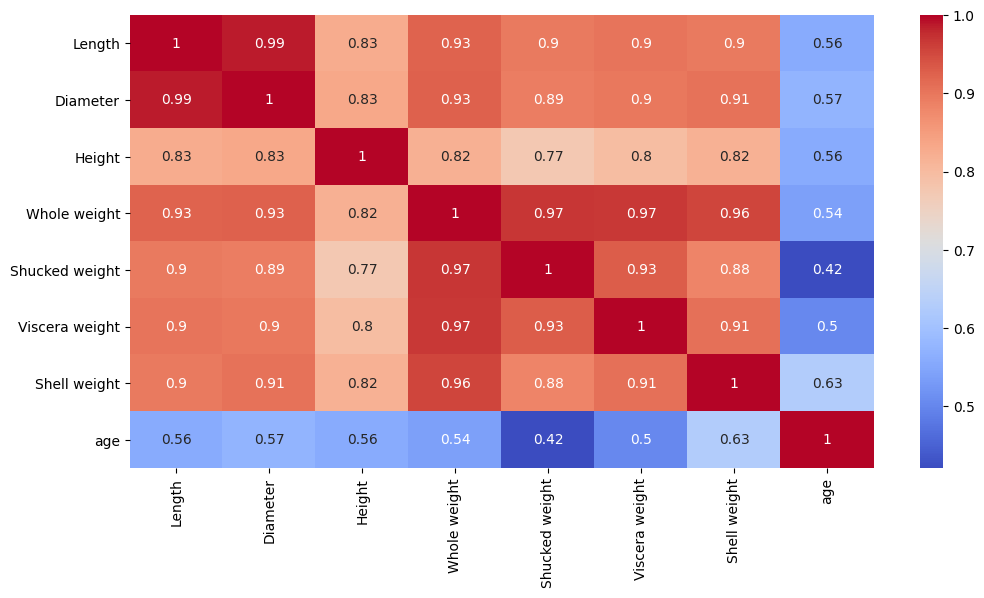

In [ ]:
corr_df = data.corr(method='pearson')
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(corr_df,cmap='coolwarm',annot=True)

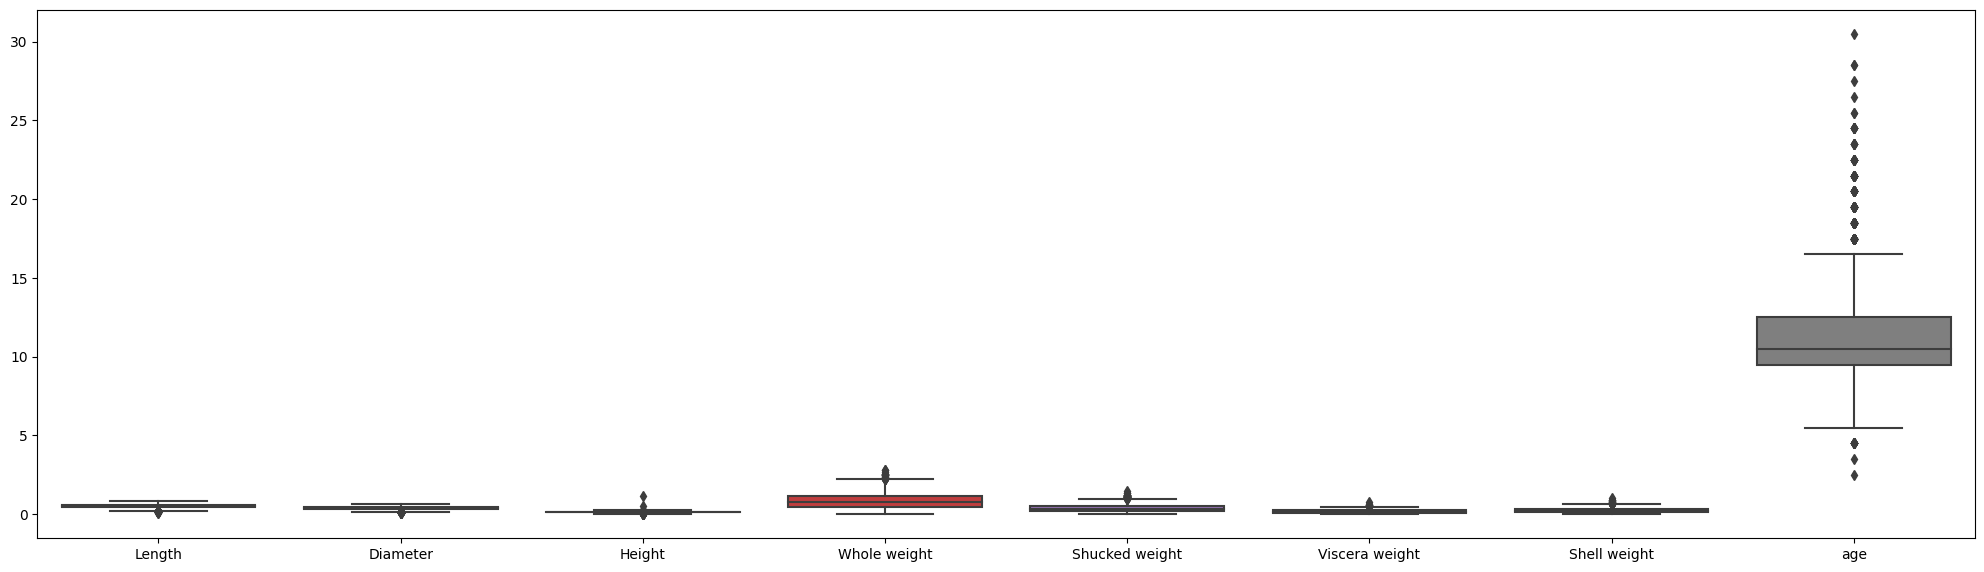

In [ ]:
plt.figure(figsize=(25,7),dpi=100)
sns.boxplot(data = data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight','age']])

In [ ]:
from numpy import percentile
columns = data.columns
for j in columns:
    if isinstance(data[j][0], str) :
        continue
    else:
        for i in range(len(data)):
            #defining quartiles
            quartiles = percentile(data[j], [25,75])
            # calculate min/max
            lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
            upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
            if data[j][i] > upper_fence:
                data[j][i] = upper_fence
            elif data[j][i] < lower_fence:
                data[j][i] = lower_fence

In [ ]:
data.head(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,8.5


In [ ]:
data.shape

(4177, 9)

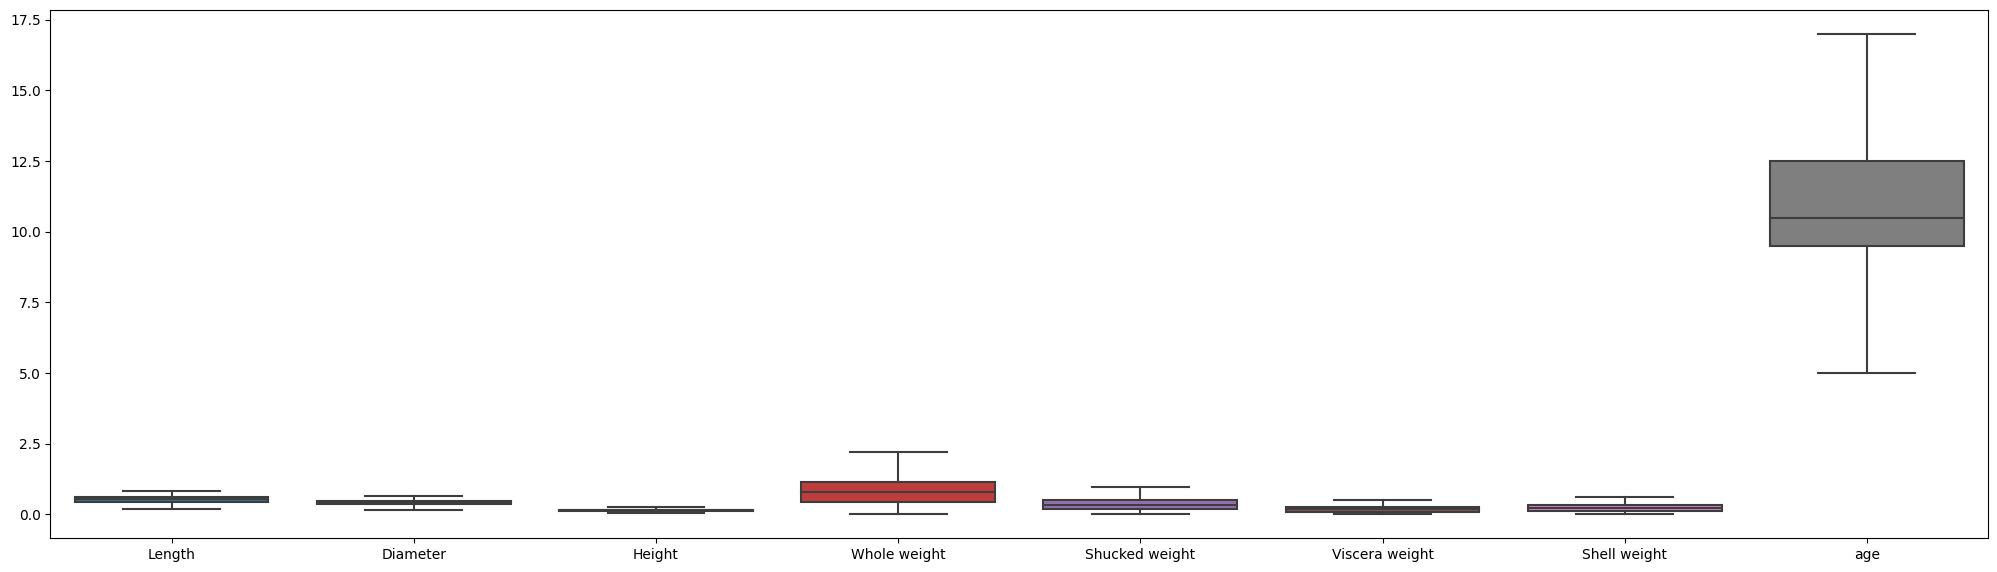

In [ ]:
plt.figure(figsize=(25,7),dpi=100)
sns.boxplot(data = data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight','age']])

In [ ]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
BusinessTravel= data[["Sex"]]
BusinessTravel= pd.get_dummies(BusinessTravel, drop_first = False)
BusinessTravel.head()

,Sex_F,Sex_I,Sex_M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


In [ ]:
# Concatenate dataframe --> train_data + Airline + Source + Destination
data = pd.concat([data,BusinessTravel], axis = 1)

In [ ]:
data.head(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age,Sex_F,Sex_I,Sex_M
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,16.5,0,0,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,8.5,0,0,1


In [ ]:
data.drop('Sex', axis = 1, inplace = True)

In [ ]:
data.head(2)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,8.5,0,0,1


In [ ]:
data.shape

(4177, 11)

In [ ]:
x=data.drop('age',axis=1)

In [ ]:
x.shape

(4177, 10)

In [ ]:
y=data['age']

In [ ]:
y.shape

(4177,)

In [ ]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection=selection.fit(x, y)

In [ ]:
print(selection.feature_importances_)

[0.08939305 0.10335725 0.12010115 0.12453142 0.12869901 0.09786802
 0.24024393 0.01062325 0.07490816 0.01027476]


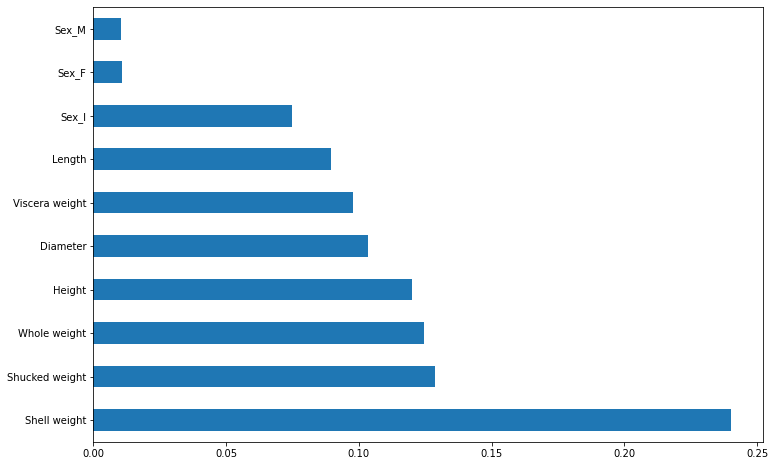

In [ ]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(selection, prefit=True)
x = selector.transform(x)

In [ ]:
x.shape

(4177, 5)

In [ ]:
y=y.values.reshape(-1,1)

In [ ]:
y.shape

(4177, 1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=42)

In [ ]:
x_train.shape

(2923, 5)

In [ ]:
x_test.shape

(1254, 5)

In [ ]:
y_train.shape

(2923, 1)

In [ ]:
y_test.shape

(1254, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.coef_

array([[ 10.9836935 ,  23.71757618,   4.47944758, -16.55365971,
          8.23247787]])

In [ ]:
lm.intercept_

array([3.75140697])

In [ ]:
lm.score(x_train,y_train)

0.5647751226704578

In [ ]:
pred=lm.predict(x_test)
print('predicate result:',pred)
print('actual price',y_test)

predicate result: [[13.19333468]
 [11.66087732]
 [15.36742988]
 ...
 [ 9.04709829]
 [13.70485916]
 [ 9.53099691]]
actual price [[10.5]
 [ 9.5]
 [17. ]
 ...
 [ 8.5]
 [12.5]
 [ 9.5]]


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
print('error')
print("mean absolute error:",mean_absolute_error(y_test,pred))
print("mean square error",mean_squared_error(y_test,pred))
print('rooot mean square error',np.sqrt(mean_squared_error(y_test,pred)))

error
mean absolute error: 1.4618509168047984
mean square error 3.515040651264504
rooot mean square error 1.8748441671948375


In [ ]:
from sklearn.metrics import r2_score
print('R2 score ',r2_score(y_test,pred))

R2 score  0.5403585983150883


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [ ]:
score=cross_val_score(lm,x,y,cv=10,scoring='neg_mean_squared_error')
print('score of mean \n',score.mean())
print('score of standard devition \n',score.std())
y_pred=cross_val_predict(lm,x,y,cv=5)
print('prediction \n',y_pred)

score of mean 
 -3.5784128336542884
score of standard devition 
 1.4597509865454723
prediction 
 [[ 9.59651723]
 [ 8.53244146]
 [11.54732731]
 ...
 [12.86920927]
 [11.3534558 ]
 [11.88060275]]


In [ ]:
import numpy as np
from numpy import *

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [ ]:
pred=knn.predict(x_test)#Pred
print(' prediction \n',pred[1:5])#print the predicted Value 

 prediction 
 [[10.5 ]
 [14.8 ]
 [11.9 ]
 [13.55]]


In [ ]:
knn.score(x_train,y_train)

0.6534749923090339

In [ ]:
print('error')
print("mean absolute error:",mean_absolute_error(y_test,pred))
print("mean square error",mean_squared_error(y_test,pred))
print('rooot mean square error',np.sqrt(mean_squared_error(y_test,pred)))

error
mean absolute error: 1.3765948963317385
mean square error 3.263542663476874
rooot mean square error 1.8065277920577014


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.5732455259772351


In [ ]:
score=cross_val_score(knn,x,y,cv=10,scoring='neg_mean_squared_error')
print('score of mean \n',score.mean())
print('score of standard devition \n',score.std())
y_pred=cross_val_predict(lm,x,y,cv=5)
print('prediction \n',y_pred)

score of mean 
 -3.452264397094764
score of standard devition 
 1.505971773877408
prediction 
 [[ 9.59651723]
 [ 8.53244146]
 [11.54732731]
 ...
 [12.86920927]
 [11.3534558 ]
 [11.88060275]]


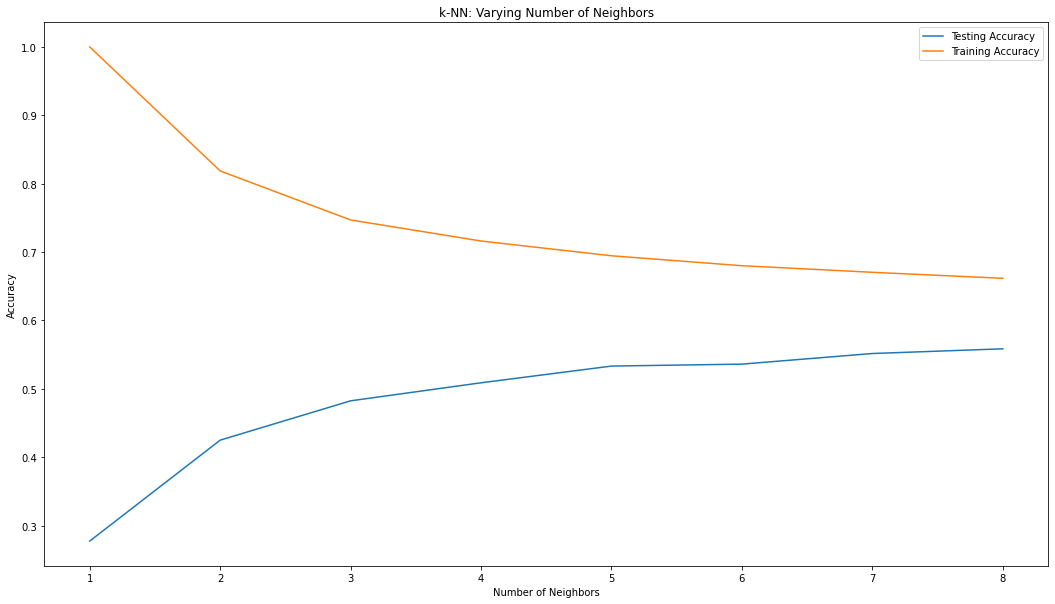

In [ ]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsRegressor(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree= DecisionTreeRegressor() #max_leaf_nodes=12 #random_state=1
tree.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
tree.score(x_train,y_train)

1.0

In [ ]:
pred=tree.predict(x_test)
print('predicate result:',pred)
print('actual price',y_test)

predicate result: [14.5 11.5 17.  ... 10.5 12.5  9.5]
actual price [[10.5]
 [ 9.5]
 [17. ]
 ...
 [ 8.5]
 [12.5]
 [ 9.5]]


In [ ]:
print('error')
print("mean absolute error:",mean_absolute_error(y_test,pred))
print("mean square error",mean_squared_error(y_test,pred))
print('rooot mean square error',np.sqrt(mean_squared_error(y_test,pred)))

error
mean absolute error: 1.763157894736842
mean square error 5.878389154704944
rooot mean square error 2.4245389571431812


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.23131727374306144


In [ ]:
score=cross_val_score(tree,x,y,cv=10,scoring='neg_mean_squared_error')
print('score of mean \n',score.mean())
print('score of standard devition \n',score.std())
y_pred=cross_val_predict(lm,x,y,cv=5)
print('prediction \n',y_pred)

score of mean 
 -6.271330877881427
score of standard devition 
 1.715618568782361
prediction 
 [[ 9.59651723]
 [ 8.53244146]
 [11.54732731]
 ...
 [12.86920927]
 [11.3534558 ]
 [11.88060275]]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RR= RandomForestRegressor() #max_leaf_nodes=12 #random_state=1
RR.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
RR.score(x_train,y_train)

0.9407206827479864

In [ ]:
print('error')
print("mean absolute error:",mean_absolute_error(y_test,pred))
print("mean square error",mean_squared_error(y_test,pred))
print('rooot mean square error',np.sqrt(mean_squared_error(y_test,pred)))

error
mean absolute error: 1.763157894736842
mean square error 5.878389154704944
rooot mean square error 2.4245389571431812


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.23131727374306144


In [ ]:
score=cross_val_score(RR,x,y,cv=10,scoring='neg_mean_squared_error')
print('score of mean \n',score.mean())
print('score of standard devition \n',score.std())
y_pred=cross_val_predict(lm,x,y,cv=5)
print('prediction \n',y_pred)

score of mean 
 -3.4786698561151077
score of standard devition 
 1.3001258838536498
prediction 
 [[ 9.59651723]
 [ 8.53244146]
 [11.54732731]
 ...
 [12.86920927]
 [11.3534558 ]
 [11.88060275]]
